In [1]:
import os, sys
sys.path.append('/rds/general/user/tla19/home/FYP/MAax')

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read JSON files
with open('boxes_times_walls.json', 'r') as f1, open('boxes_times_no_walls.json', 'r') as f2, open('ramp_times_walls.json', 'r') as f3, open('ramp_times_no_walls.json', 'r') as f4:
    data1 = json.load(f1)
    data2 = json.load(f2)
    data3 = json.load(f3)
    data4 = json.load(f4)

In [4]:
# Process data
x_values = sorted(set(data3.keys()))
mean1_values = []
mean2_values = []
mean3_values = []
mean4_values = []
std1_values = []
std2_values = []
std3_values = []
std4_values = []

for x in x_values:
    times1 = data1[x][1:]  # Discard the first entry
    times2 = data2[x][1:]  # Discard the first entry
    times3 = data3[x][1:]  # Discard the first entry
    times4 = data4[x][1:]  # Discard the first entry
    mean1 = np.mean(times1)
    mean2 = np.mean(times2)
    mean3 = np.mean(times3)
    mean4 = np.mean(times4)
    std1 = np.std(times1)
    std2 = np.std(times2)
    std3 = np.std(times3)
    std4 = np.std(times4)
    mean1_values.append(mean1)
    mean2_values.append(mean2)
    mean3_values.append(mean3)
    mean4_values.append(mean4)
    std1_values.append(std1)
    std2_values.append(std2)
    std3_values.append(std3)
    std4_values.append(std4)

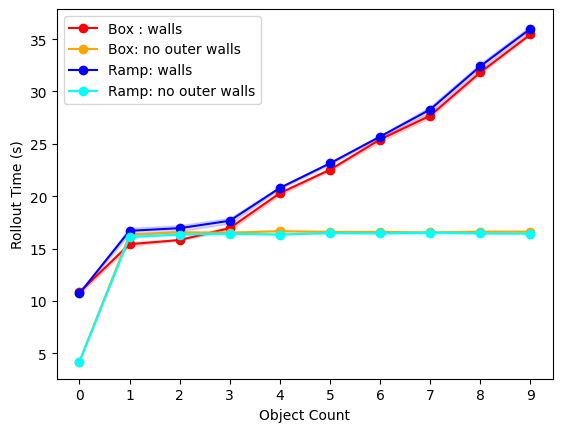

In [5]:
# Plotting
plt.plot(x_values, mean1_values, label='Box : walls', marker='o', color='red')
plt.plot(x_values, mean2_values, label='Box: no outer walls', marker='o', color='orange')
plt.plot(x_values, mean3_values, label='Ramp: walls', marker='o', color='blue')
plt.plot(x_values, mean4_values, label='Ramp: no outer walls', marker='o', color='cyan')
plt.fill_between(x_values, np.array(mean1_values) - np.array(std1_values),
                 np.array(mean1_values) + np.array(std1_values),
                 alpha=0.15, color='red')
plt.fill_between(x_values, np.array(mean2_values) - np.array(std2_values),
                 np.array(mean2_values) + np.array(std2_values),
                 alpha=0.15, color='orange')
plt.fill_between(x_values, np.array(mean3_values) - np.array(std3_values),
                 np.array(mean3_values) + np.array(std3_values),
                 alpha=0.15, color='blue')
plt.fill_between(x_values, np.array(mean4_values) - np.array(std4_values),
                 np.array(mean4_values) + np.array(std4_values),
                 alpha=0.15, color='cyan')
plt.xlabel('Object Count')
plt.ylabel('Rollout Time (s)')
plt.yscale('linear')
plt.legend()
plt.savefig('boxvramp.png')
plt.show()